# ¡Hoy vas a entender la regresión lineal simple!
---

## Introducción: El precio de las casas

A lo largo el boom de la Inteligencia Artificial (IA) a la par de los datos, el encontrar patrones dentro de estos se ha vuelto fundamental. Por ejemplo, predecir nuestras ventas en función de la inversión en marketing o explicar el comportamiento de los salarios en función de las horas de estudio de una persona es hoy posible gracias a algoritmos poderosos de Machine Learning (ML). Muy específicamente, hay una herramienta fundamental: la *Regresión lineal simple* la cual nos permite resolver ese tipo de problemas.

Entender la Regresión lineal tanto a nivel lógico-matemático como a nivel de programación es algo indispensable para todo aquel que, como yo, busque entender modelos de ML más complejos. En base a esto, me he propuesto explicar(me) esta técnica. Esto tanto para entender su relevancia como para que tú también puedas empezar a usarla.

Para este objetivo he decidido utilizar un dataset que es muy famoso de Kaggle que obtuve de aquí: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

Este dataset contiene precios de casas a la par de diversas características como el tamaño, número de habitaciones, número de baños, etc.

Lo que buscaré aplicando el modelo de *regresión lineal simple* es estimar el precio de una casa $(y)$ a partir de una caracterísica: *el tamaño* $(x)$. Aquí $y$ es la variable que queremos predecir y $x$ es la variable que usamos para predecir (en realidad puedes tomar cualquier letra pero x e y son estandares).

Nota: La elección de la variable $x$ (el tamaño de la casa) es por su alta correlación con $y$ (el precio de la casa). Esto lo veremos a continuación con un gráfico

In [1]:
# Antes del código instalamos las librerías necesarias para este notebook

! pip install -r requirements.txt


[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: C:\Users\nbartolo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# Mostramos los gráficos de plt en nuestro notebook

%matplotlib inline

In [3]:
# Importamos las librerías instaladas

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Definimos parámetros comunes de nuestros gráficos

In [4]:
sns.set_style(style='darkgrid')
sns.set_context(context='talk')
sns.set_theme(style="ticks", palette="tab10", context="talk")
plt.rcParams.update({
    'figure.figsize': (10, 7),  # Tamaño optimizado para mejor visualización
    'axes.titlesize': 14,  # Tamaño del título
    'axes.labelsize': 12,  # Tamaño de etiquetas de ejes
    'xtick.labelsize': 11,  # Tamaño de etiquetas del eje X
    'ytick.labelsize': 11,  # Tamaño de etiquetas del eje Y
    'legend.fontsize': 10,  # Tamaño del texto de la leyenda
    'axes.titleweight': 'bold',  # Negrita en títulos
    'axes.labelweight': 'bold',  # Negrita en etiquetas de ejes
 })

### Cargamos los datos

In [5]:
data = pd.read_csv('./house-prices-dataset/Housing.csv')

# Visualizamos que todo esté en orden
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Visualizamos la correlación entre el precio $(y)$ y el tamaño $(x)$

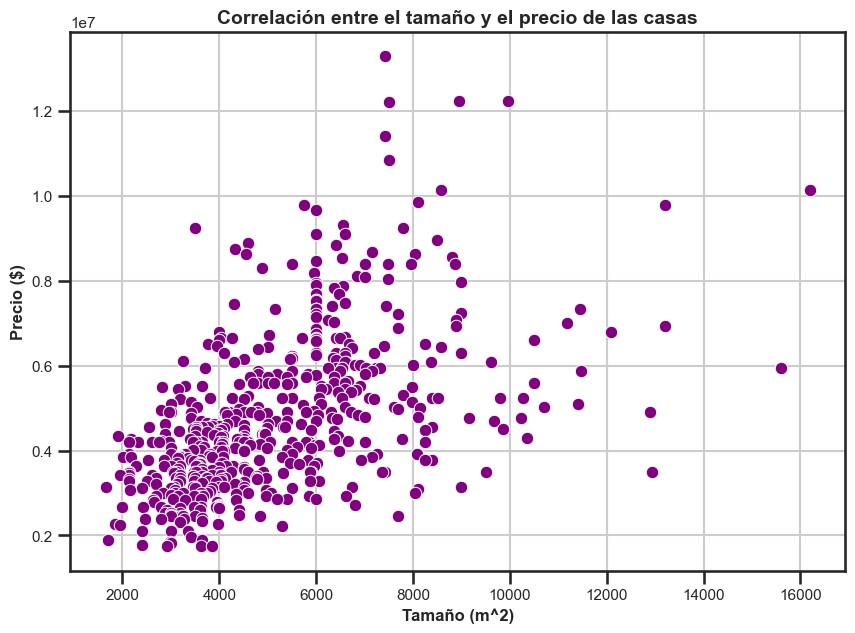

In [6]:
# Utilizamos un gráfico de correlación

sns.scatterplot(
    data=data,
    x='area',
    y='price',
    color='purple'
)

plt.title('Correlación entre el tamaño y el precio de las casas')
plt.xlabel('Tamaño (m^2)')
plt.ylabel('Precio ($)')
plt.grid(True)
plt.show()

Aquí en primer lugar podemos visualizar una relación lineal, esto quiere decir que parece haber un patrón de tendencia: *a medida que aumenta el tamaño de una casa el precio tiende a subir*

Es aquí donde planteamos el uso de la regresión lineal simple. Vamos a modelar una linea que nos permita "seguir" la dirección general de la relación entre el tamaño $(x)$ y el precio $(y)$. La pregunta es, *¿cómo lo hacemos?*

--- 

## 1. Todo surge a partir de la función de la recta $y = mx + b$

Es sorprendente que todo nazca de una ecuación "simple". La ecuación de la recta $y = mx + b$ es fundamental ya que modelamos una linea recta (como lo veremos gráficamente más adelante)
A partir de esto buscaremos cómo encontrar la mejor linea

Para nuestro caso la ecuación sería: $$\hat{y} = mx+b$$

Donde:

* $\hat{y}$ es nuestra variable estimada o sea el precio de las casas
* $m$ es la pendiente o la inclinación de nuestra recta
* $x$ es la variable con la que buscamos explicar nuestra variable $y$ y
* $b$ es el intercepto, el punto en el eje $y$ donde parte nuestra recta. Para este caso podríamos definirlo como el precio base

### $m$ y $b$ tienen infinitas combinaciones

Para ejemplificar esto usaré el gráfico de correlación que usamos antes y agregaré 3 rectas con valores arbitrarios para los parámetros $m$ y $b$

Te invito a que modifiques los valores para visualizar cómo afecta cada parámetro

In [7]:
# Creamos la función de la recta en código

def recta(m,x,b=0): #Por defecto el valor de b lo asignaremos a 0
    return m*x+b

In [8]:
# Creamos los valores arbitrarios para mis 3 rectas

m1 = 1200
m2 = 700
m3 = 0
b1 = 0
b2 = 7500000
b3 = 3000000

# Definimos x usando numpy

x = np.linspace(0,data['area'].max(),len(data['area']))

# Creamos nuestras tres rectas con variación en los valores de los parámetros

y1 = recta(m=m1,x=x,b=b1)
y2 = recta(m=m2,x=x,b=b2)
y3 = recta(m=m3,x=x,b=b3)

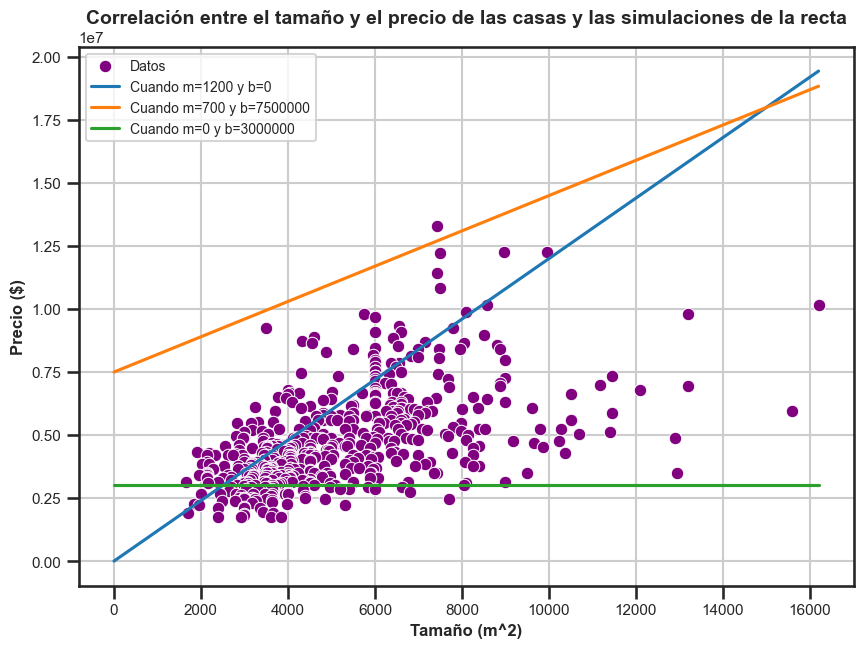

In [9]:
# Utilizamos un gráfico de correlación

sns.scatterplot(
    data=data,
    x='area',
    y='price',
    color='purple',
    label='Datos'
)

plt.plot(x,y1,label=f'Cuando m={m1} y b={b1}')
plt.plot(x,y2,label=f'Cuando m={m2} y b={b2}')
plt.plot(x,y3,label=f'Cuando m={m3} y b={b3}')
plt.title('Correlación entre el tamaño y el precio de las casas y las simulaciones de la recta')
plt.xlabel('Tamaño (m^2)')
plt.ylabel('Precio ($)')
plt.grid()
plt.legend()
plt.show()

Aquí podemos observar los cambios al variar el valor de los parámetros $m$ y $b$ Para reforzar, nota que $m$ la pendiente es la inclinación de la recta y $b$ es el intercepto, el punto donde se cruza o intercepta el eje $y$

¡Las combinaciones son infinitas!

---

## 2. ¿Cómo sabemos que nuestra línea es adecuada?

Como vimos, podemos dibujar infinitas lineas, aquí surge la pregunta de ¿cómo podemos encontrar la mejor linea?

Para esto necesitamos introducir el concepto de error individual o residuo

### El error individual o residuo

El error $(\epsilon)$ es la distancia vertical entre nuestro dato real y nuestro dato predicho. 

A continuación veremos un ejemplo con código

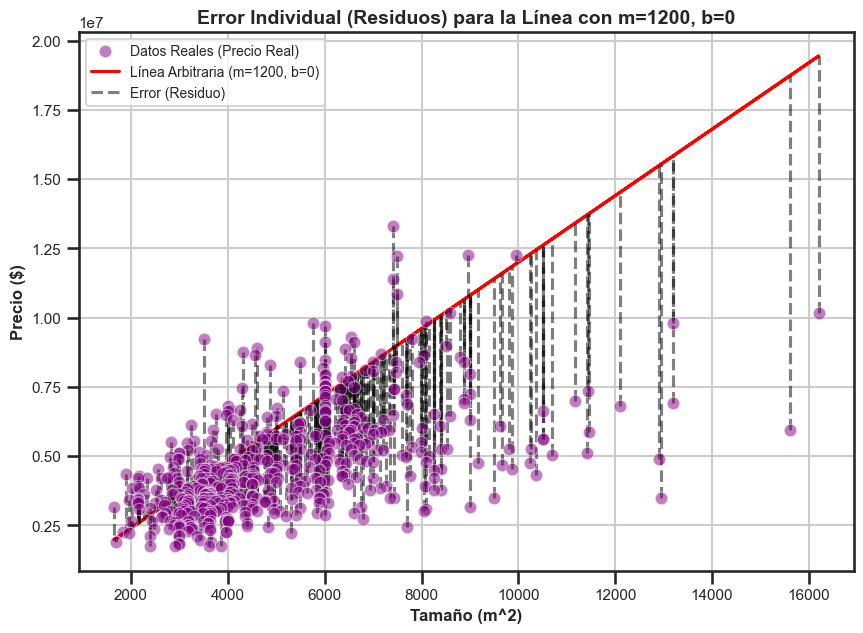

In [10]:
# Graficamos los datos reales

sns.scatterplot(
    x=data['area'],
    y=data['price'],
    color='purple',
    label='Datos Reales (Precio Real)',
    zorder=5, # Poner los puntos encima de las líneas
    alpha=0.5
)

# Graficamos la recta estimada

y_estimada = recta(m=m1, x=data['area'], b=b1)

plt.plot(
    data['area'],
    y_estimada,
    color='red',
    linestyle='-',
    label=f'Línea Arbitraria (m={m1}, b={b1})'
)

# Dibujamos las distancias verticales (errores/residuos) Gracias chatGPT❤️

for i in range(len(data['area'])):
    plt.vlines(
        x=data['area'].iloc[i],           # Posición X del punto
        ymin=data['price'].iloc[i],         # Valor Y real (inicio del segmento)
        ymax=y_estimada.iloc[i],# Valor Y estimado (fin del segmento)
        color='black',
        linestyle='--',
        alpha=0.5,                     # Algo de transparencia
        label='Error (Residuo)' if i == 0 else "" # Etiqueta solo el primero
        )

plt.title(f'Error Individual (Residuos) para la Línea con m={m1}, b={b1}')
plt.xlabel('Tamaño (m^2)')
plt.ylabel('Precio ($)')
plt.legend()
plt.grid(True)
plt.show()


Aquí podemos ver que cada dato 'real' $(y)$ tiene cierta distancia con el dato estimado $(\hat{y})$. Esto es la representación gráfica del error: *qué tanto varía nuestro modelo con respecto a los datos reales*, otra forma de decirlo es que es un indicador para medir la precisión de nuestro modelo.

Matemáticamente se expresa así $$\epsilon = y_i - \hat{y}_i$$

Para generalizar nuestro indicador podríamos sumarlo $$S = \sum_i^n = (y_i - \hat{y}_i)$$
A continuación lo veremos con código

In [11]:
# Calculamos el error e imprimimos las diferencias entre y e y_estimada

error = data['price'] - y_estimada
error.sample(25)

234     -36000
108    2219500
331   -4792000
205   -2660000
48     2295000
199    -133000
34      -88000
276    -975000
336   -5776000
312    -221500
221     663000
452   -7650000
494   -5430000
543   -1742000
433    -886000
222   -6239200
250     303000
313    -321000
70     1990000
143    -160000
270   -1060000
229   -6910400
101    -370000
78     -190000
469   -2510000
dtype: int64

Aquí, al tomar una muestra del calculo de los errores, vemos que al hacerlo tenemos una limitante: las variaciones son tanto positivas como negativas. 

Esto implica que al sumarlas ciertas cantidades se cancelen afectando la posibilidad de generar un indicador de la precisión de nuestro modelo.

Hay dos posibles soluciones para este problema:

* 1 Utilizar el valor absoluto de cada valor y
* 2 Elevar al cuadrado cada valor y así todos los valores serán positivos

Ambas son soluciones viables, sin embargo la segunda ofrece muchas ventajas, por ejemplo al elevar al cuadrado "penaliza" a las cantidades más grandes, por ejemplo elevar 2 al cuadrado nos da 4 y 10 nos da 100, hay una diferencia considerable entre dos cantidades muy cercanas . Otra ventaja es que al optimizar utilizamos derivadas, entonces esto vuelve más amigable a la función para derivarla. Por lo tanto lo óptimo sería elevar al cuadrado el cálculo del error.

Basándonos en el razonamiento anterior tenemos que para obtener un indicador para medir la precición de nuestro modelo podemos sumar los errores cuadráticos teniendo como resultado solo números positivos a esto se le llama *suma de errores cuadráticos* en inglés SSE $$SSE = \sum_{i=1}^{n} (y_i-\hat{y}_i)^2 $$

In [12]:
# Calculamos la suma del error cuadrático

error_cuadratico = error ** 2
print(error_cuadratico.sample(25))
SSE = error_cuadratico.sum()
print(f'S es igual a {SSE}')

243      2220100000000
352     10342656000000
15       3610000000000
255      6666724000000
65      13883076000000
515      1965604000000
115     12816400000000
178     10712529000000
195       103684000000
338       423801000000
290      1140624000000
428      2319529000000
249      2088025000000
41         43264000000
477      9072144000000
185      2280100000000
244      3363556000000
538      6194125440000
199        17689000000
360      1295044000000
372        30976000000
365      8048569000000
4        6280036000000
71        198025000000
125    163251729000000
dtype: int64
S es igual a 3841436447318600


Si obtenemos el promedio de esta suma obtenemos la famosa función de error cuadrático medio (en inglés SME), éste es el indicador o métrica que buscaremos *minimizar* para encontrar la mejor recta $$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i-\hat{y}_i)^2$$

Veámoslo con código

In [13]:
# Obtenemos el promedio del error cuadrático

MSE = error_cuadratico.mean()
MSE

np.float64(7048507242786.422)

Así es como obtenemos una métrica que nos permita saber *qué tan bien se ajusta nuestro modelo a los datos*

¡Listo! Ya tenemos un indicador generalizado para comparar nuestros modelos

---

## 3. ¿Cómo encuentro la mejor linea? Usemos la  magia del cálculo para optimizar 🚀

La cuestión es encontrar la combinación de los valores de $m$ y $b$ para que nuestro SME sea lo más pequeño posible

### Simplificación de la función

Para entender cómo funciona la optimización de nuestra función haremos una simplificación sencilla. Esta simplificación consiste en igualar $b$ a cero, o sea $b = 0$ 

Nuestra ecuación de la recta ahora es: $$\hat{y} = mx + 0$$ o $$\hat{y} = mx$$

Igualar $b$ a cero es "forzar" que nuestra recta pase por el punto 0 de la gráfica. Para nuestro ejercicio $b$ representa el precio base de las casas, y forzar que b = 0 es algo que no va de acuerdo a la realidad ya que los precios de las casa empiezan en  ~ 300k. 
Pero por el lado matemático tenemos que optimizar solo un parámetro $(m)$ lo cual, para nuestro objetivo, es más sencillo 

Ahora el objetivo es encontrar el valor óptimo de $(m)$ 
Esto lo podemos hacer derivando nuestra función e igualándola a cero y obteniendo una segunda derivada para confirmar que encontramos, para este caso, un mínimo o un valle.

### La función a optimizar

#### Primero derivar

Recordemos que tenemos una métrica que nos permite medir el error de nuestro modelo, esa es la función a optimizar, muy especifecimicamente buscamos obtener el valor que minimiza nuestro error $$MSE = \frac{1}{n} \sum_i^n (y_i - \hat{y}_i)^2$$ Ya sabemos que $$\hat{y} = mx$$ Sustituimos $$MSE = \frac{1}{n} \sum_i^n (y_i - mx_i)^2$$

Para derivar la función tenemos que: $$  \frac{dMSE}{dm} = \frac{d}{dm}[\frac{1}{n} \sum_i^n (y_i - mx_i)^2] $$ Primero utilizamos las propiedades de las derivadas sabiendo que derivar cualquier constante es igual a 0



Para esta función tenemos que usar la regla de la cadena ya que es una función compuesta donde entonces tenemos que $$  \frac{dMSE}{dm} =\frac{1}{n} \sum_i^n (\frac{df}{du} . \frac{dg}{dm}) $$ 

Donde 
* $f(u) = u^2 $ 

donde $u =y_i−mx$ 

y 
* $g(m) = y_i - mx_i$

Entonces resolvemos primero $f'(u)$

$$f'(u) = 2u$$ 
Reemplazamos $u$
$$f'(u) = 2(y_i - mx_i)$$

Ahora $g'(m)$

$$g'(m) = -x_i$$

Unimos nuestras derivadas siguiendo la regla de la cadena $(\frac{df}{du} . \frac{dg}{dm})$ y ¡listo! Ya tenemos la derivada ⭐

$$ MSE'(m) = \frac{1}{n} \sum_i^n 2(y_i - mx_i) . (-x_i) = -\frac{2}{n} \sum_i^n (y_i - mx_i) . (x_i) $$ 

#### Ahora igualamos a 0 el resultado para encontrar el punto mínimo de nuestra función MSE, es decir el parámetro que minimiza el error de nuestro modelo

$$-\frac{2}{n} \sum_i^n (y_i - mx_i) . (x_i) = 0 $$ 

Si multiplicamos nuestra función en ambos lados por $-\frac{n}{2}$ 
tenemos  que

$$ \sum_i^n (y_i - mx_i) . (x_i) = 0 $$

Aplicamos la propieda distributiva para esta función

$$ \sum_i^n y_i x_i - mx_i^2 = 0 $$

Podemos distribuir la sumatoria también y sabiendo que $m$ es una constante la podemos poner antes de la sumatoria

$$ \sum_i^n y_i x_i - m \sum_i^n x_i^2 = 0 $$

Despejamos $m$

$$ \sum_i^n y_i x_i = m \sum_i^n x_i^2 $$

$$ \frac{\sum_i^n y_i x_i}{\sum_i^n x_i^2}= m $$

Por lo tanto tenemos que 

$$m =  \frac{\sum_i^n y_i x_i}{\sum_i^n x_i^2}$$

Y ¡Listo! Ahora tenemos la función para optimizar nuestro parámetro $m$

**Nota**: Recuerda que solo como ejemplo igualamos $ b = 0 $ En el caso real tendríamos que optimizar $b$ y $m$ con derivadas parciales para resolver la derivada y usaríamos el mismo principio de igualar el resultado a cero para la optimización

Vamos a obtener el resultado de $m*$ para nuestro conjunto de datos 

In [14]:
# Calculamos m* usando la fórmula a la que llegamos

sum_xy = np.sum(data['area'] * data['price'])  # sum(x_i * y_i)
sum_x_cuadrado = np.sum(data['area'] ** 2)  # sum(x_i^2)

m_optima = sum_xy / sum_x_cuadrado

print(f'El valor m* es: {m_optima:.2f}')

El valor m* es: 855.71


Aquí encontramos el valor óptimo cuando $b = 0$ para m, es decir, este valor ~$855.71$ reduce al mínimo posible el error. Este es el valor que mejor ajusta nuestro modelo a los datos reales 

#### **Bonus:** Hagamos una comprobación viendo cómo se comporta gráficamente nuestra función, usemos código

In [15]:
# Definimos la función mse en código

def MSE_function(m,x,y):
    y_hat = m * x # Recuerda que b = 0
    mse =((y - y_hat) ** 2).mean() # Recuerda que esta es una función exponencial

    return mse

In [16]:
# Simulamos valores para m

m_values = np.linspace(0,1500,3000)

In [17]:
# Creamos una lista con los valores de MSE calculador a partir de nuestros valores m 

mse_values = [MSE_function(m=m,x=data['area'],y=data['price']) for m in m_values]

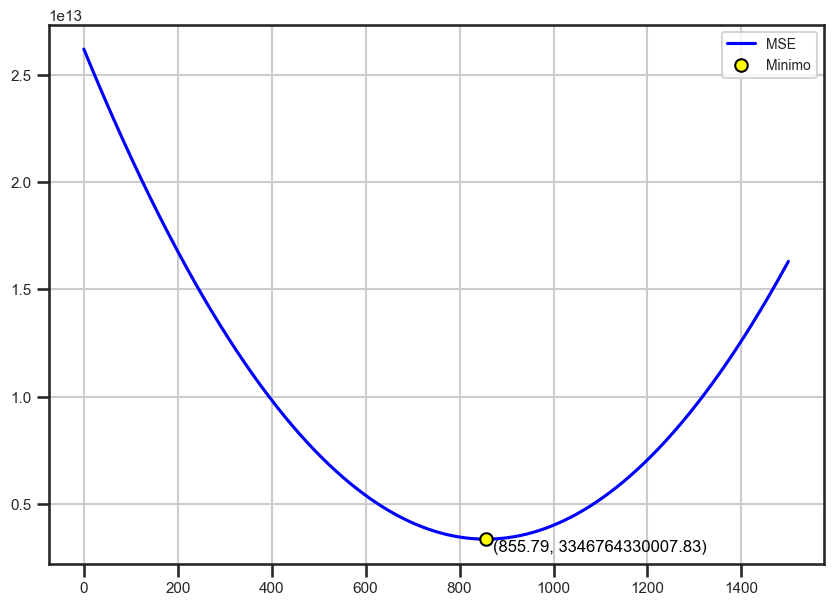

In [18]:
#Graficamos nuestra función MSE

sns.lineplot(
    x=m_values,
    y=mse_values,
    color='blue',
    label='MSE'
)

# Graficamos el punto mínimo de nuestra curva

plt.scatter(
    m_values[mse_values.index(min(mse_values))],
    min(mse_values),
    color='yellow',
    edgecolors='black',
    label='Minimo',
    zorder=3
)

# Imprimimos las coordenadas del punto mínimo de la función

plt.text(
    m_values[mse_values.index(min(mse_values))] + 15, min(mse_values),  # Coordenadas del texto
    f"({m_values[mse_values.index(min(mse_values))]:.2f}, {min(mse_values):.2f})",  # Texto con las coordenadas
    fontsize=12, color='black', ha='left', va='top'  # Estilo del texto
)

plt.legend()
plt.grid(True)


Observamos que encontramos por medio de un método gráfico que encontramos un valor similar, probablemente el error se debe a la limitación en el número de datos que definimos en la variable `m_values`. Sin embargo validamos que tenemos un valor aproximado al calculo de nuestra variable `m_optima` $855.71$

---

## 4. ¿Cómo sabemos qué tan buena es nuestra predicción?

¡Bien! Ya podemos medir el error y encontrar el menor error. 

Ahora tenemos que evaluar nuestro modelo, ¿cómo? Comparando el error de nuestro modelo con la variación de los datos, o sea *cuánto varían nuestros datos con respecto de* $\bar{y}$. Esta relación nos indica la proporción de variabilidad que nuestro modelo no explica.

Vamos a definirlo:

Ya conocemos la función para calcular la suma del error cuadrático medio (en inglés SSE):
$$SSE = \sum_i^n (y-\hat{y})^2$$

Ahora, tenemos que sumar el error con respecto de solo usar nuestro promedio $\bar{y}$. Es muy parecida a la función $SSE$

LA función se llama *suma de cuadrados totales*
$$SST = \sum_i^n (y-\bar{y})^2$$

La relación entre estas dos evaluaciones medidas se llama *coeficiente de determinación o $R^2$* y se expresa así

$$R^2 = 1− \frac{SSE}{SST}$$
​


Es importante aclarar que aún no hemos aplicado nuestra $m*$ en nuestra recta, por lo tanto tenemos que calcular $y*$ 

Para evalur visualmente nuestro modelo

A continuación vamos a calcularlo con python

In [19]:
# Calculamos nuestra recta óptima

y_optima = m_optima * data['area']
y_optima

0      6.349368e+06
1      7.667161e+06
2      8.522871e+06
3      6.417825e+06
4      6.349368e+06
           ...     
540    2.567130e+06
541    2.053704e+06
542    3.097670e+06
543    2.490116e+06
544    3.294483e+06
Name: area, Length: 545, dtype: float64

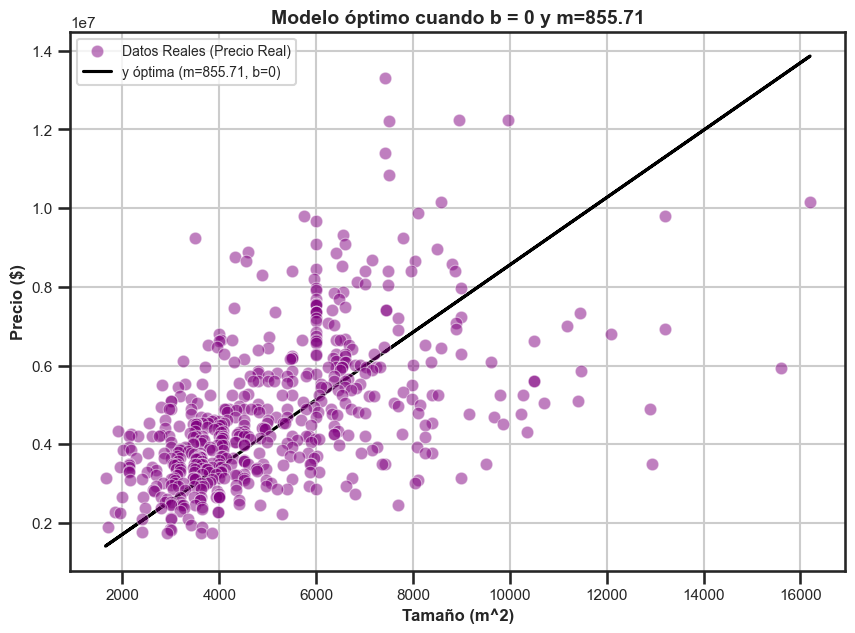

In [20]:
# Graficamos los datos reales

sns.scatterplot(
    x=data['area'],
    y=data['price'],
    color='purple',
    label='Datos Reales (Precio Real)',
    zorder=5, # Poner los puntos encima de las líneas
    alpha=0.5
)

# Graficamos la recta óptima para nuestro ejercicio

y_estimada = recta(m=m_optima, x=data['area'], b=b1)

plt.plot(
    data['area'],
    y_estimada,
    color='black',
    linestyle='-',
    label=f'y óptima (m={m_optima:.2f}, b={0})'
)

plt.title(f'Modelo óptimo cuando b = 0 y m={m_optima:.2f}')
plt.xlabel('Tamaño (m^2)')
plt.ylabel('Precio ($)')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# Calculamos el error e imprimimos las diferencias entre y e y_estimada

# error_modelo = data['price'] - y_optima # así calculamos el residuo de nuestro modelo

SSE = ((data['price'] - y_optima) ** 2).sum()
print(f'SSE es igual a {SSE}')

SSE es igual a 1823986463320144.0


In [22]:
# Calculamos el error e imprimimos las diferencias entre y e y_estimada o sea SST

SST = ((data['price'] - data['price'].mean()) ** 2).sum() #y-ybar
f'SST es igual a  {SST}'

'SST es igual a  1903208129566391.8'

Ahora calculamos 1 menos la relación entre el SSE y el SST

In [23]:
r_2 = 1 - (SSE / SST)
r_2

np.float64(0.04162532989195289)

Bien, aquí tenemos un valor muy raro ya que el intercepto $(b)$ es igual a 0. La idea de $R^2$ como indicador para evaluar nuestro modelo consiste en comparar el valor del error de nuestro modelo vs el valor del error con usando solamente el promedio de nuestros datos. 

Entonces la forma de interpretarlo es si: 
* $R^2 es \approx 1$ significa que nuestro error del modelo (SSE) es más pequeño que el error total (SST) Esto significa que es mejor usar nuestro modelo
* $R^2 es < 0$ significa que nuestro modelo se ajusta peor que solo usar la media como predicción de nuestros datos

En conclusión, para nuestros datos obtuvimos una $R^2$ casi cercana a 0 ya que, como se comentó más arriba, para nuestro caso en específico, el precio base real de una casa nunca es cero. Esto tiene como consecuencia que nuestra predicción tenga errores de predicción muy grandes.

¡Listo! Ya conocemos una métrica para evaluar nuestros modelos y saber si vale la pena todo el procedimiento o es mejor usar solamente el promedio para estimar nuestras predicciones.

## Conclusiones

Este notebook nos permitió entender cómo funciona la regresión lineal simple. Todo esto desde la relación entre dos variables $x$ y $y$ (área y precios respectivamente) hasta la derivación analítica para minimizar el erro cuadrático medio (MSE). Recuerda que para nuestro ejercicio forzamos a que la recta pasará por el punto 0 de nuestro plano (todo esto igualando __$b=0$__). Siguiendo esa condición encontramos la mejor pendiente para nuestro modelo __$m* = 855.7$__ con un ajuste __$R^2 = 0.041$__ que es casi cercano a cero.

Por supuesto, por la necesidad de simplificar el modelo para poder explicar algunos conceptos clave nos encontramos con limitaciones para nuestros resultados. Es decir, si nosotros _robustecieramos nuestro modelo buscando $b*$ y agregaramos más variables $x$ que expliquen el comportamiento de nuestra variable $y$ podríamos conseguir mejores resultados_.

Sin embargo, me siento muy emocionado y orgulloso de poder compartir con ustedes este notebook que me llevó a entender muchos conceptos angulares para el ML que, estoy seguro, serán claves para modelos más complejos.